#                                  BANK MARKETING

In [1]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
train_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
print(train_data.head())

      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4    

In [6]:
print(train_data.tail())

          ID  age         job   marital  education default  balance housing  \
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
31642  unknown         no  
31643  unknown        yes  
31

In [5]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB
None


In [7]:
print(train_data.isnull().sum())

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [8]:
train_data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


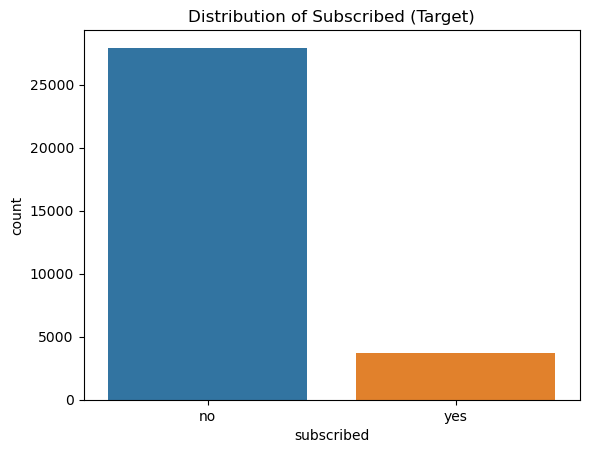

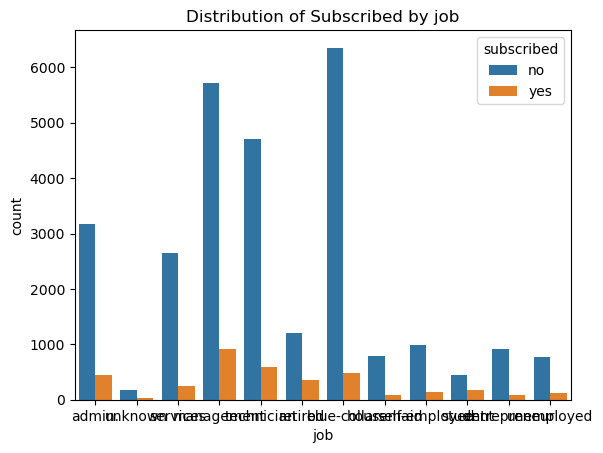

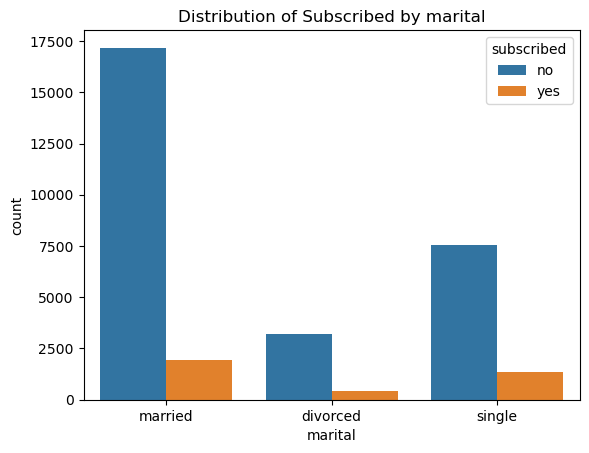

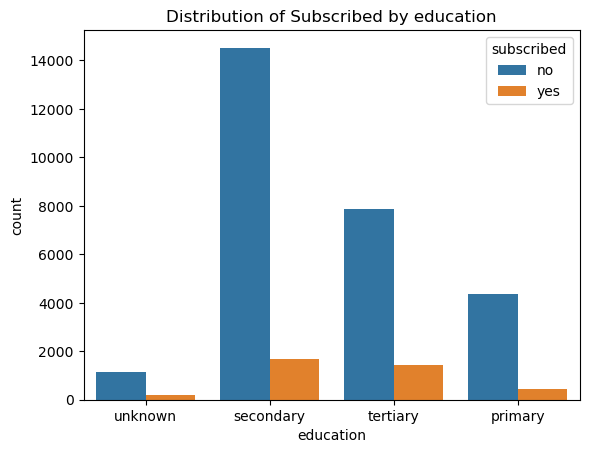

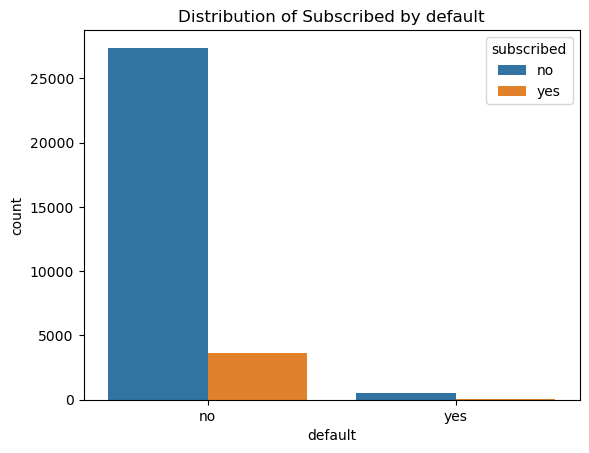

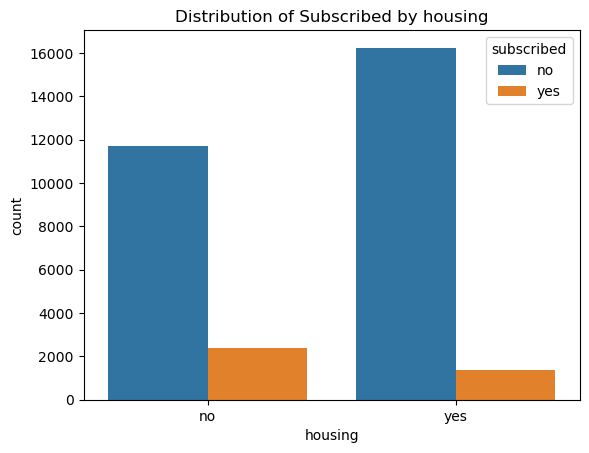

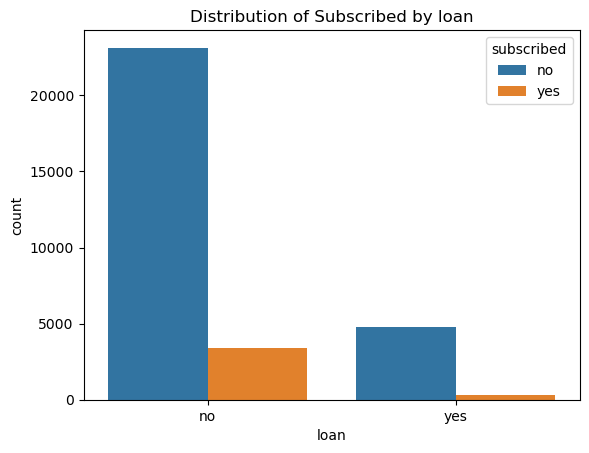

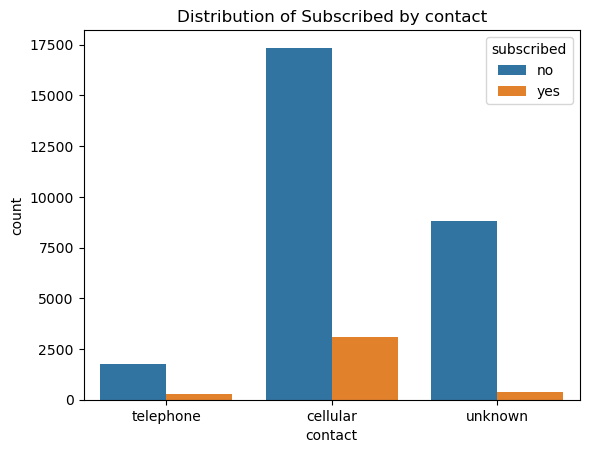

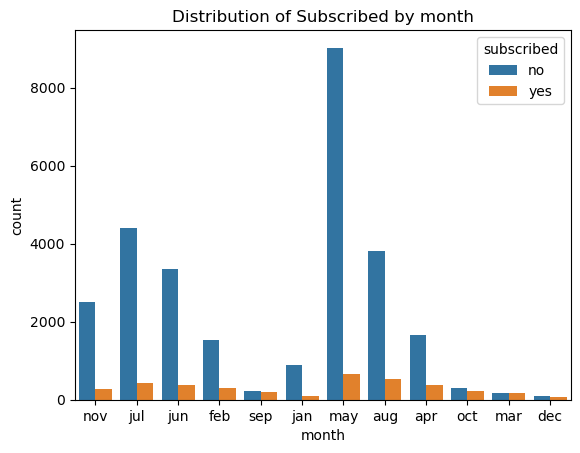

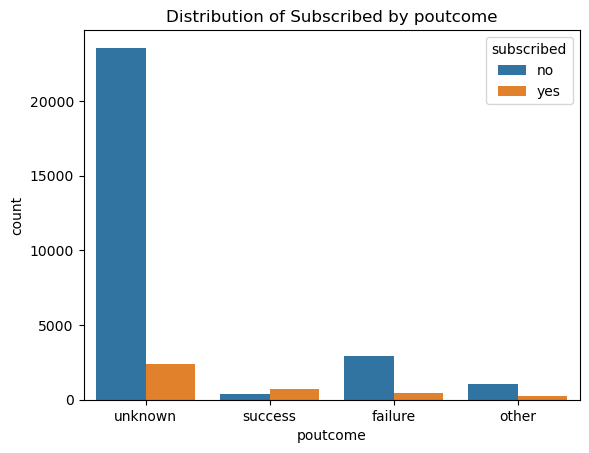

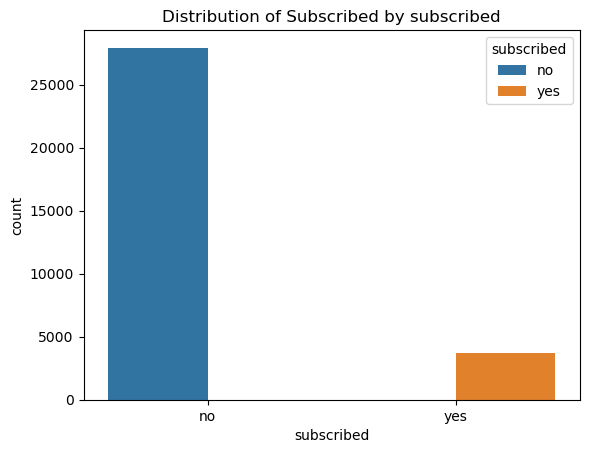

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='subscribed', data=train_data)
plt.title('Distribution of Subscribed (Target)')
plt.show()


categorical_columns = train_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    sns.countplot(x=column, hue='subscribed', data=train_data)
    plt.title(f'Distribution of Subscribed by {column}')
    plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

train_data = train_data.drop(columns=['ID'])

label_encoder = LabelEncoder()
for column in categorical_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])

X = train_data.drop(columns=['subscribed'])
y = train_data['subscribed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5599
           1       0.53      0.20      0.29       731

    accuracy                           0.89      6330
   macro avg       0.72      0.59      0.62      6330
weighted avg       0.86      0.89      0.86      6330



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

train_data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
train_data

test_url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv"
test_data = pd.read_csv(test_url)

train_data = train_data.drop(columns=['ID'])
test_data = test_data.drop(columns=['ID'])

label_encoder = LabelEncoder()
for column in train_data.select_dtypes(include=['object']).columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])

for column in test_data.select_dtypes(include=['object']).columns:
    
    if '<unknown>' not in label_encoder.classes_:
        label_encoder.classes_ = np.append(label_encoder.classes_, '<unknown>')
    
    test_data[column] = test_data[column].map(lambda s: '<unknown>' if s not in label_encoder.classes_ else s)
    test_data[column] = label_encoder.transform(test_data[column])


X_train = train_data.drop(columns=['subscribed'])
y_train = train_data['subscribed']


X_test = test_data


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


predictions_df = pd.DataFrame({'ID': test_data.index, 'subscribed': y_pred})
print(predictions_df)


          ID  subscribed
0          0           0
1          1           0
2          2           0
3          3           0
4          4           0
...      ...         ...
13559  13559           0
13560  13560           0
13561  13561           0
13562  13562           0
13563  13563           0

[13564 rows x 2 columns]
